# Milestone 2

# Introduction

Nama  : Maulana Azmi Izzuddin

Batch : FTDS-013

## Dataset

Pada tugas Milestone 2 ini menggunakan dataset Airline Passenger Satisfaction yang didapat dari kaggle.
sumber(https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

Dataset ini berisikan hasil survey kepuasan dari penumpang suatu maskapai. Sehingga pada kasus ini akan melakukan Classification terhadap kepuasan penumpang maskapai penerbangan.

Dimana data set ini berisikan info sebagai berikut :
- Gender: Gender of the passengers 
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Objective

- Melakukan EDA pada dataset untuk mendapatkan insight pada dataset
- Memahami konsep supervised learning dan unsupervised learning
- Mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Melakukan evaluasi model
- Melakukan model tuning
- Melakukan model deployment

# Import Libraries

Libraries yang diperlukan :

In [173]:
import numpy as np #untuk operasi array
import pandas as pd #mannipulasi dataframe
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
from sklearn import preprocessing #preprocessing data sebelum implementasi ML
from sklearn import model_selection #digunakan untuk split train-test set
from sklearn.ensemble import ExtraTreesClassifier # Untuk melihat feature importances.
from sklearn.feature_selection import SelectKBest, chi2 # features selection dengan chi score
from sklearn.linear_model import LogisticRegression #digunakan untuk modelling logistic regression
from sklearn.tree import DecisionTreeClassifier #digunakan untuk modelling decision tree
from sklearn.neighbors import KNeighborsClassifier #digunakan untuk modelling knn
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier #digunakan untuk modelling ensemble
from sklearn import metrics #Untuk metrics evaluasi model
from feature_engine import outliers #untuk deteksi Outliers
from sklearn.compose import ColumnTransformer #digunakan untuk membuat columntransformer
from sklearn.pipeline import Pipeline #digunakan untuk membuat pipeline
import time #digunakan untuk menghitung waktu proses
import warnings #untuk ignore warning
import pickle #saving model

In [174]:
warnings.filterwarnings('ignore') # untuk ignore warning

# Loading Data

Loading dataset ke variabel df :

In [175]:
# Loading data
df = pd.read_csv('passanger_satisfaction_airlines.csv')

In [176]:
# Melihat head atau 5 data pertama
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [177]:
# Melihat tail atau 5 data terakhir
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,129879,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


Terlihat bahwa terdapat column Unnamed:0 dan ID customer yang tidak diperlukan dan mempengaruhi pada pembuatan model classification. Sehingga pada data preprocessing data ini akan di drop. 

In [178]:
# Melihat shape data
df.shape

(129880, 25)

Pada dataset ini terdiri dari 25 column yang berisikan 129.880 entry data.

In [179]:
# Cek duplikasi data
df.duplicated().sum()

0

Terlihat bahwa pada data ini tidak ada data yang duplicate.

In [180]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [181]:
# Cek missing value
df[df['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,127976,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
128037,128037,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,128205,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
129032,129032,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


Pada column Arrival Delay in Minutes terdapat missing values sebanyak 393. Dimana data ini akan di handle pada saat data preprocessing.

Melihat summary statistic pada data frame :

In [182]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Terlihat bahwa pada delay baik deparature atau arrival ini rata-rata delayya sekitar 14-15 minutes tetapi kalau dilihat dari nilai Maximum nya sangat jauh sekali, yaitu 1584 - 1592 minutes dimana ini sekitar 1 hari yang dimana mungkin ini akan menjadi outlier pada dataset. Sehingga hal ini akan dilihat kembali pada saat data preprocessing saat handling outlier.

# Exploratory Data Analysis (EDA)

## Explore Data

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

- Pada dataset ini terdiri dari  4 data type object (categorical) dan 20 data type int64 dan float 64 (numerical). Dimana pada data set ini terdiri dari 129880 entries data.

In [184]:
# Melihat unique values dan jumlahnya pada tiap column dengan menggunakan for-loop
for col in df:
    unique_values = np.unique(df[col]) #melihat unique values apa saja
    number_values = len(unique_values) #melihat jumlah unique values
    if number_values <= 6: # jika data type object maka print hingga detail apa saja unique values
        print("Jumlah unique values pada {} : {} yaitu {}".format(col,number_values,unique_values))
    else:
        print("Jumlah unique values pada {} : {}".format(col,number_values))

Jumlah unique values pada Unnamed: 0 : 129880
Jumlah unique values pada id : 129880
Jumlah unique values pada Gender : 2 yaitu ['Female' 'Male']
Jumlah unique values pada Customer Type : 2 yaitu ['Loyal Customer' 'disloyal Customer']
Jumlah unique values pada Age : 75
Jumlah unique values pada Type of Travel : 2 yaitu ['Business travel' 'Personal Travel']
Jumlah unique values pada Class : 3 yaitu ['Business' 'Eco' 'Eco Plus']
Jumlah unique values pada Flight Distance : 3821
Jumlah unique values pada Inflight wifi service : 6 yaitu [0 1 2 3 4 5]
Jumlah unique values pada Departure/Arrival time convenient : 6 yaitu [0 1 2 3 4 5]
Jumlah unique values pada Ease of Online booking : 6 yaitu [0 1 2 3 4 5]
Jumlah unique values pada Gate location : 6 yaitu [0 1 2 3 4 5]
Jumlah unique values pada Food and drink : 6 yaitu [0 1 2 3 4 5]
Jumlah unique values pada Online boarding : 6 yaitu [0 1 2 3 4 5]
Jumlah unique values pada Seat comfort : 6 yaitu [0 1 2 3 4 5]
Jumlah unique values pada Inflight

- Pada data ini terdapat 4 column yang merupakan data numerical, yaitu column Age, Flight Distance, Deparature Delay, dan Arrival Delay. Pada data preprocessing data ini akan dilakukan scaling atau normalisasi.
- Pada dataset ini terdapat 13 column yang sebenarnya merupakan ata categorical tetapi sudah dalam bentuk numerical, yaitu Inflight wifi service,Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness. Dimana column ini pada preprocessing tidak lagi dilakukan encoding melainkan scalling saja.

- Pada data ini juga terdapat 4 column data categorical, yaitu Gender, Customer Type, Type of Travel dan Class nya. Pada data preprocessing data ini akan dilakukan encoding berdasarkan tipe nominal atau ordinal.
    - data nominal : Gender, Type of Travel, dan Customer Type
    - data ordinal : Class dengan urutan Eco - Eco Plus - Business



## Visualization Data

### Target Balance

Text(0.5, 0, 'Satisfaction')

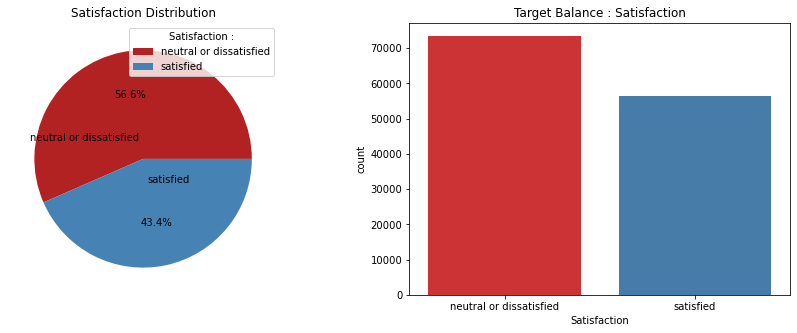

In [185]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['satisfaction'].value_counts(),autopct='%1.1f%%', labels= ['neutral or dissatisfied','satisfied'],labeldistance= 0.2, colors = ['firebrick','steelblue'])
plt.title("Satisfaction Distribution")
plt.legend(title = 'Satisfaction :', loc ='best')


plt.subplot(1,2,2)
sns.countplot(x='satisfaction',data=df, palette='Set1')
plt.title('Target Balance : Satisfaction')
plt.xlabel('Satisfaction')

- Data target terdapat pada column satisfaction dengan dua label yaitu satisfied atau netural/dissatisfied.
- Data Target lebih banyak berada pada label neutral/dissatisfied namun perbedaannya tidak jauh dengan label satisfied. Sehingga data target dapat bilang masih dalam data yang balance antar targetnya. 
- Sehingga tidak ada ketimpangan dalam data target

### Gender

Text(0.5, 1.0, 'Gender Distribution Based on Satisfaction')

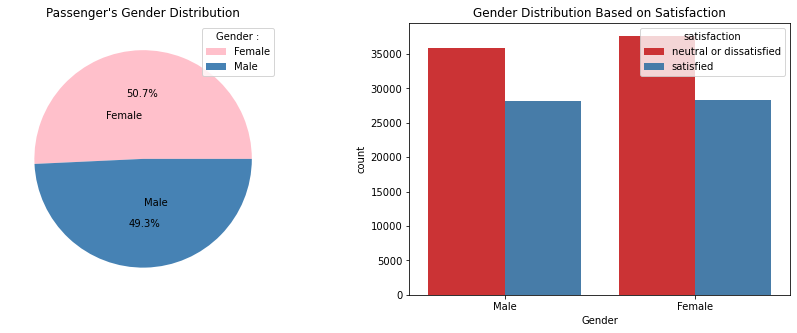

In [186]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(x = df['Gender'].value_counts(),autopct='%1.1f%%', labels= ['Female','Male'],labeldistance= 0.4, colors = ['pink','steelblue'])
plt.title("Passenger's Gender Distribution")
plt.legend(title = 'Gender :')

plt.subplot(1,2,2)
sns.countplot(x = 'Gender', data = df,hue='satisfaction',palette='Set1')
plt.title('Gender Distribution Based on Satisfaction')

- Perbandingan penumpang male dan female cukup seimbang, walaupun gender female sedikit lebih banyak di bandingkan male.
- Penumpang Male dan Female tidak ada perbedaan dalam kepuasan pelayanan maskapai.

<AxesSubplot:xlabel='Gender', ylabel='count'>

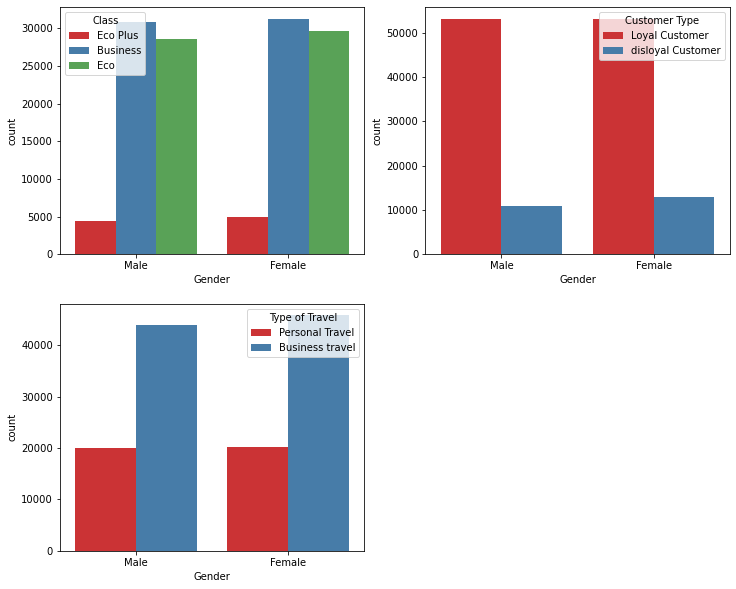

In [187]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(x='Gender',data=df,hue='Class',palette='Set1')

plt.subplot(2,2,2)
sns.countplot(x='Gender',data=df,hue='Customer Type',palette='Set1')

plt.subplot(2,2,3)
sns.countplot(x='Gender',data=df,hue='Type of Travel',palette='Set1')


- Terlihat berdasarkan Gender tidak ada perbedaan dalam hal type travel dimana keduanya mayoritas adalah business travel.
- Terlihat berdasarkan Gender tidak ada perbedaan dalam hal class nya dimana keduanya mayoritas adalah business class, kedua eco class, dan yang terakhir adalah class eco plus.
- Terlihat berdasarkan Gender tidak ada perbedaan dalam hal type customer dimana mayoritas adalah customer yang loyal terhadap maskapai.

### Age

Text(0.5, 1.0, 'Age Distribution Based on Satisfaction of the Passenger')

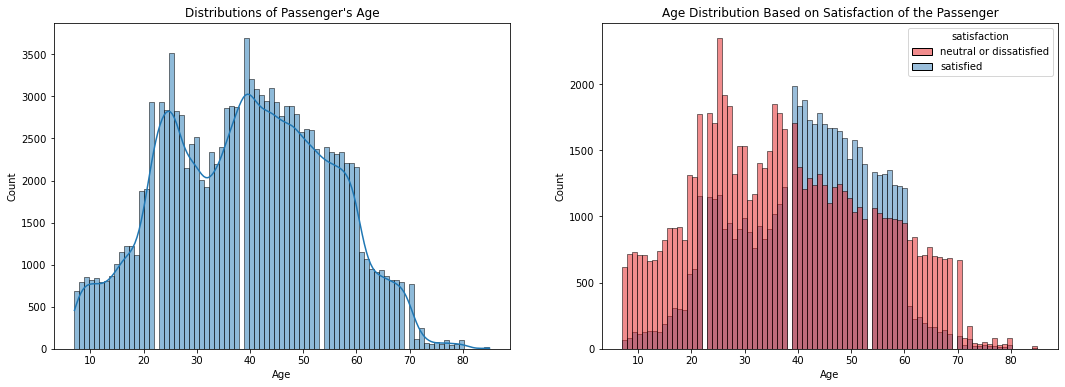

In [188]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='Age',data=df,kde=True,palette='Set1')
plt.title("Distributions of Passenger's Age")

plt.subplot(1,2,2)
sns.histplot(x='Age',data=df,hue='satisfaction',palette='Set1')
plt.title('Age Distribution Based on Satisfaction of the Passenger')

- Pada distribusi umur penumpang maskapai, terlihat bahwa mayoritas penumpang berada di usia 20 - 30 tahun dan 40 - 50 tahun.
- Berdasarkan persebaran kepuasan penumpang, didapatkan informasi bahwa mayoritas penumpang yang neutral atau dissatisfied berada pada rentan umur 40 tahun ke bawah dan 60 tahun ke atas.
- Penumpang yang puas terhadap pelayanan maskapai berada pada rentan umur 40 tahun hingga 60 tahun.

Text(0.5, 1.0, 'Age Distribution Based on Type of Travel of the Passenger')

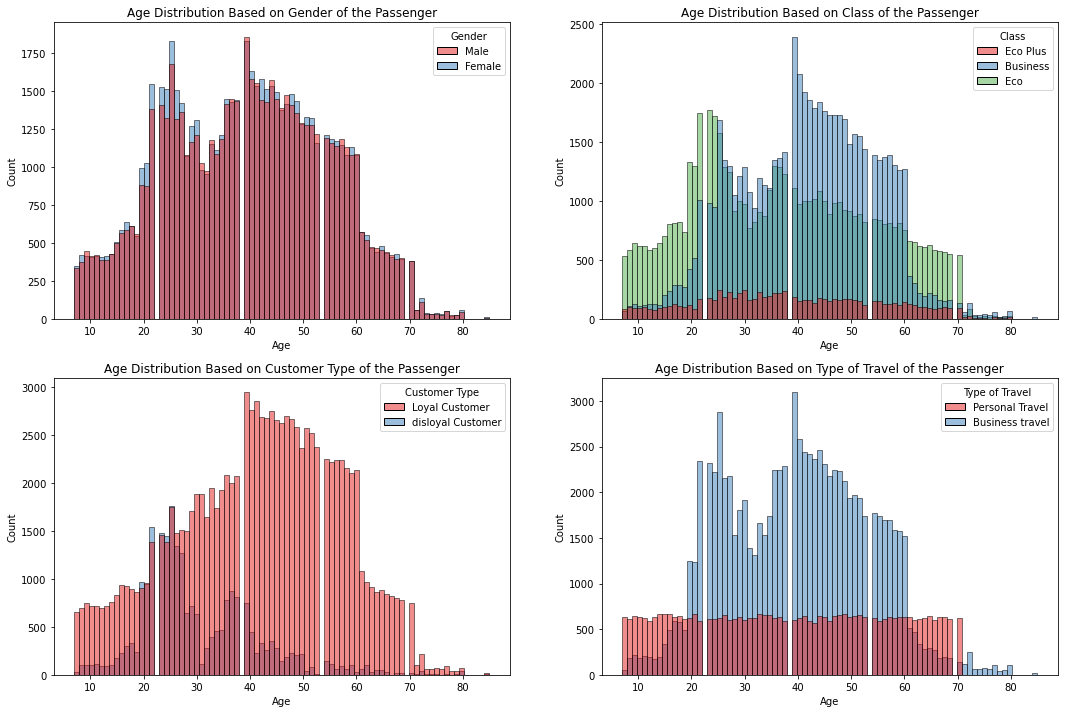

In [189]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.histplot(x='Age',data=df,hue='Gender',palette='Set1')
plt.title('Age Distribution Based on Gender of the Passenger')

plt.subplot(2,2,2)
sns.histplot(x='Age',data=df,hue='Class',palette='Set1')
plt.title('Age Distribution Based on Class of the Passenger')

plt.subplot(2,2,3)
sns.histplot(x='Age',data=df,hue='Customer Type',palette='Set1')
plt.title('Age Distribution Based on Customer Type of the Passenger')

plt.subplot(2,2,4)
sns.histplot(x='Age',data=df,hue='Type of Travel',palette='Set1')
plt.title('Age Distribution Based on Type of Travel of the Passenger')

- Berdasarkan gendernya, distribusi umur penumpang tidak jauh berbeda antar gendernya.
- Berdasarkan tipe class nya, mayoritas pengguna class Eco berada pada umur di bawah 20 tahun dan di atas 70 tahun.
- Mayoritas pengguna business class berada pada umur 25 tahun hingga 60 tahun.
- Mayoritas adalah customer yang loyal berdasarkan distribusi umurnya.
- Penumpang yang melakukan perjalanan untuk Personal Travel terdistribusi merata pada setiap umurnya.
- Penumpang yang melakukan perjalanan untuk Business Travel mayoritas berada pada umur 20 tahun hingga 60 tahun, hal ini mungkin disebabkan karena apda umur tersebut sudah memiliki pekerjaan sehingga mereka menggunakan moda transportasi pesawat untuk keperluan businees atau pekerjaan.


### Class of Passenger

Text(0.5, 1.0, 'Class Distribution Based on Type of Travel of the Passenger')

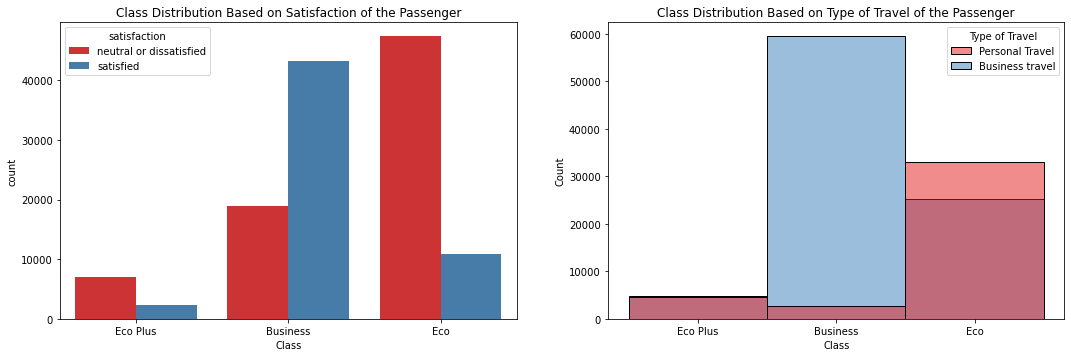

In [190]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x='Class',data=df,hue='satisfaction',palette='Set1')
plt.title('Class Distribution Based on Satisfaction of the Passenger')

plt.subplot(2,2,2)
sns.histplot(x='Class',data=df,hue='Type of Travel',palette='Set1')
plt.title('Class Distribution Based on Type of Travel of the Passenger')

- Business Class memberikan nilai yang baik terhadap pelayanan maskapai dimana terlihat bahwa mayoritas penumpang yang berada pada business class satisfied terhadap pelayanan maskapai. Namun terlihat untuk class Eco dan Eco Plus mayoritas neutral/dissatisfied terhadap pelayanan maskapai.
- Penumpang yang melakukan Business Travel mayoritas menggunakan Business Class, sedangkan penumpang yang melakukan personal Travel, mayoritas menggunakan Eco Class.
- Untuk Eco Pluss Class digunakan untuk personal travel dan business travel.

### Flight Distance

Text(0.5, 1.0, 'Flight Distance Distribution Based on Satisfaction of the Passenger')

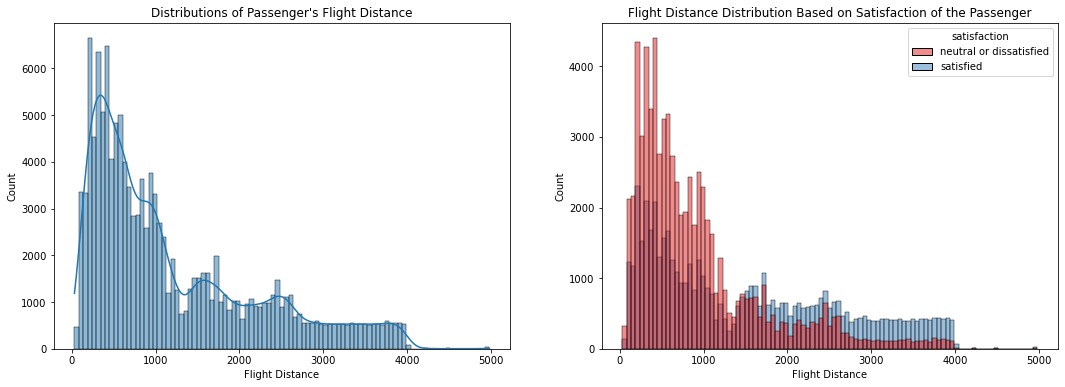

In [191]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(x='Flight Distance',data=df,kde=True,palette='Set1')
plt.title("Distributions of Passenger's Flight Distance")

plt.subplot(1,2,2)
sns.histplot(x='Flight Distance',data=df,hue='satisfaction',palette='Set1')
plt.title('Flight Distance Distribution Based on Satisfaction of the Passenger')

- Berdasarkan Fligth Distance yang dilakukan penumpang, mayoritas penumpang melakukan penerbangan dengan distance di bawah 1000.
- Mayoritas penumpang satisfied terhadap pelayanan maskapai pada saat melakukan perjalanan di atas 1500.
- Namun, penumpang yang melakukan perjalanan di bawah 1500 secara keseluruhan neutral atau dissatisfied terhadap pelayanan maskapai.

Text(0.5, 1.0, 'Flight Distance Distribution Based on Type of Travel of the Passenger')

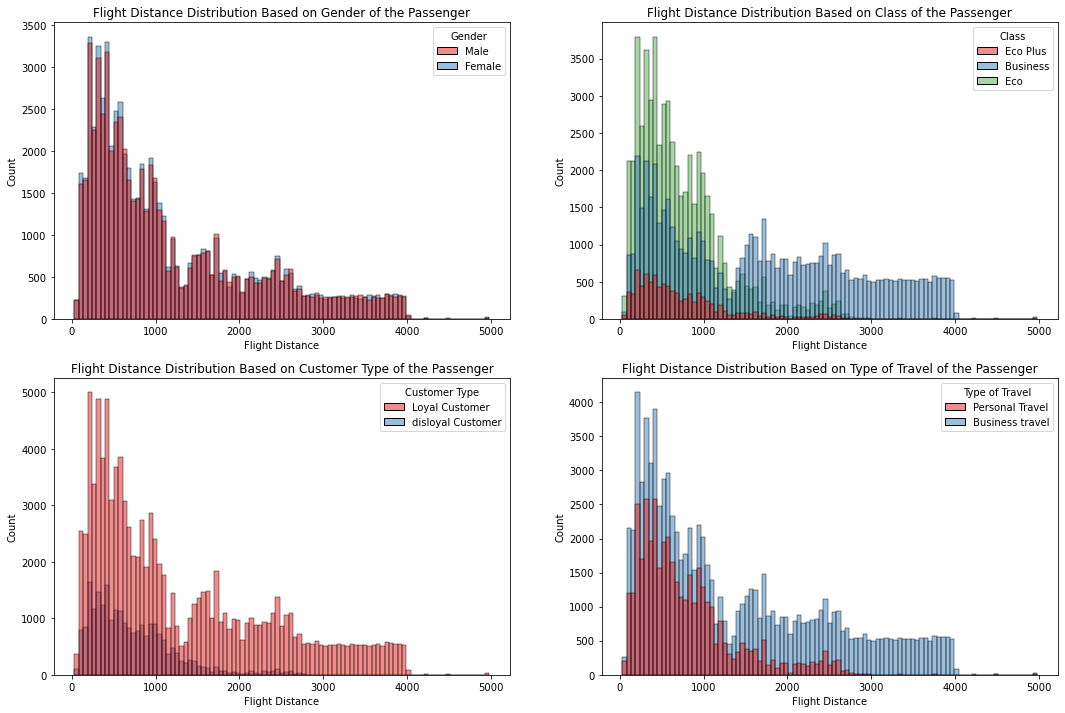

In [192]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.histplot(x='Flight Distance',data=df,hue='Gender',palette='Set1')
plt.title('Flight Distance Distribution Based on Gender of the Passenger')

plt.subplot(2,2,2)
sns.histplot(x='Flight Distance',data=df,hue='Class',palette='Set1')
plt.title('Flight Distance Distribution Based on Class of the Passenger')

plt.subplot(2,2,3)
sns.histplot(x='Flight Distance',data=df,hue='Customer Type',palette='Set1')
plt.title('Flight Distance Distribution Based on Customer Type of the Passenger')

plt.subplot(2,2,4)
sns.histplot(x='Flight Distance',data=df,hue='Type of Travel',palette='Set1')
plt.title('Flight Distance Distribution Based on Type of Travel of the Passenger')

- Berdasarkan Gender, tidak ada perbedaan pada penumpang Male dan Female terhadap jarak perjalanan pada trip dengan maskapai.
- Mayoritas penumpang menggunakan Eco Class maskapai pada saat melakukan perjalanan di bawah distance 1500 atau jarak yang tidak jauh.
- Mayoritas penumpang menggunakan Business Class maskapai pada saat melakukan perjalanan di atas distance 1500 dimana ini adalah perjalanan jauh.
- Jarang pernumpang yang menggunakan Eco Plus Class untuk perjalanan jarak jauh.
- Mayoritas penumpang maskapai adalah penumpang yang loyal.
- Berdasarkan flight distancenya, mayoritas penumpang yang melakukan business travel melakukan perjalanan yang jauh dibandingkan dengan penumpang yang melakukan personal travel.

### Departure/Arrival Delay

Text(0.5, 1.0, 'Distribution of Departure and Arrival Time Delay on Satisfaction of Passenger')

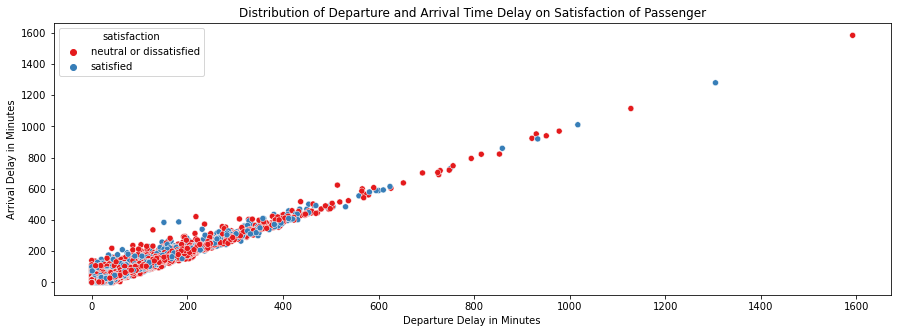

In [193]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'Departure Delay in Minutes',y='Arrival Delay in Minutes',data=df,hue='satisfaction', palette='Set1')
plt.title('Distribution of Departure and Arrival Time Delay on Satisfaction of Passenger')

- Berdasarkan waktu delay pada Departure dan Arrival dapat dilihat bahwa ketika delay terjadi pada saat Deparature maka akan terjadi delay juga pada saat Arrival nya. Selain itu tidak ada pembeda terhadap berapa lama delaynya dengan kepuasan penumpang maskapai.

### Satisfaction on Arplane's Services

Plotting untuk melihat pengaruh kepuasan services dari maskapai terhadap kepuasan penumpang secara keseluruhan:

Text(0.5, 1.0, 'Passenger Satisfaction on Cleanliness')

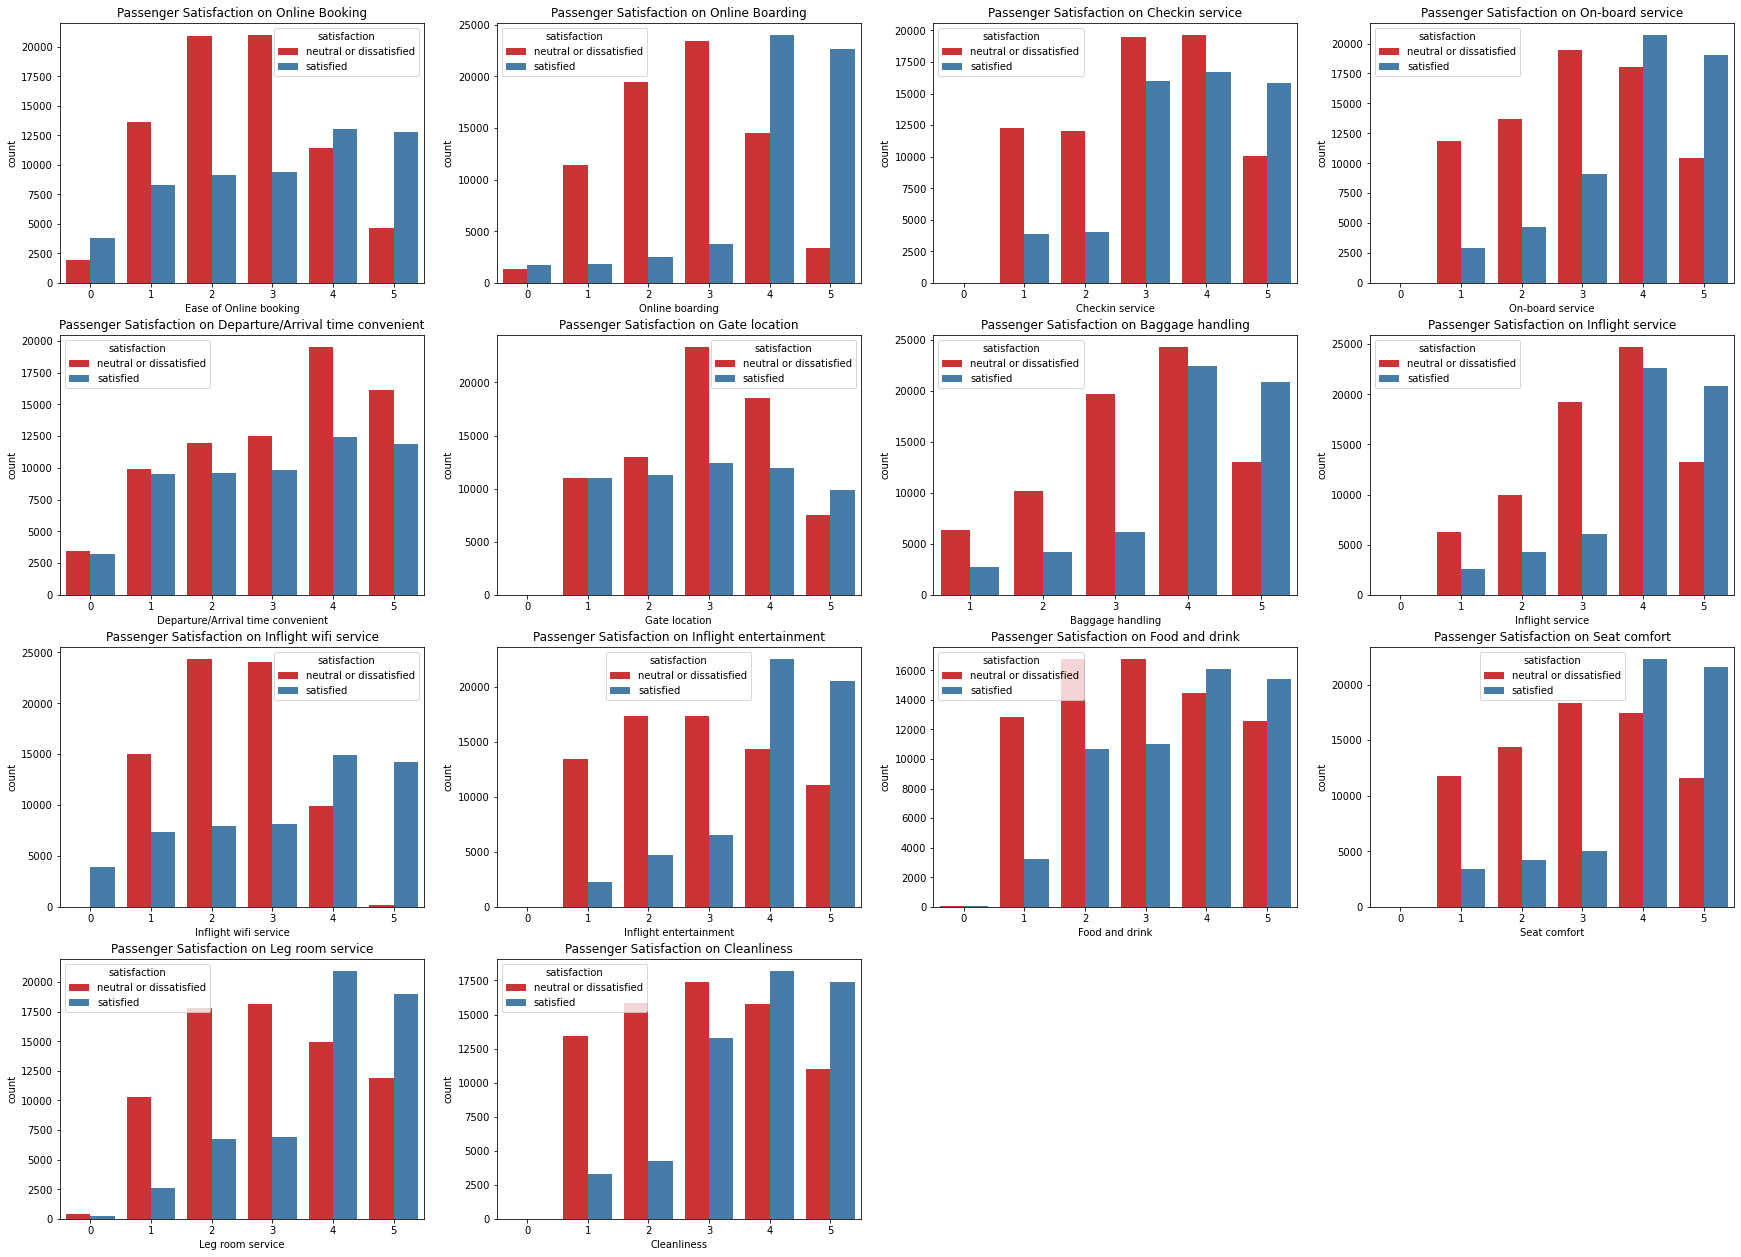

In [194]:
plt.figure(figsize=(30,22))

plt.subplot(4,4,1)
sns.countplot(x = 'Ease of Online booking', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Online Booking')

plt.subplot(4,4,2)
sns.countplot(x = 'Online boarding', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Online Boarding')

plt.subplot(4,4,3)
sns.countplot(x = 'Checkin service', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Checkin service')

plt.subplot(4,4,4)
sns.countplot(x = 'On-board service', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on On-board service')

plt.subplot(4,4,5)
sns.countplot(x = 'Departure/Arrival time convenient', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Departure/Arrival time convenient')

plt.subplot(4,4,6)
sns.countplot(x = 'Gate location', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Gate location')

plt.subplot(4,4,7)
sns.countplot(x = 'Baggage handling', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Baggage handling')

plt.subplot(4,4,8)
sns.countplot(x = 'Inflight service', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Inflight service')

plt.subplot(4,4,9)
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Inflight wifi service')

plt.subplot(4,4,10)
sns.countplot(x = 'Inflight entertainment', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Inflight entertainment')

plt.subplot(4,4,11)
sns.countplot(x = 'Food and drink', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Food and drink')

plt.subplot(4,4,12)
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Seat comfort')

plt.subplot(4,4,13)
sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Leg room service')

plt.subplot(4,4,14)
sns.countplot(x = 'Cleanliness', hue = 'satisfaction', data = df,palette='Set1')
plt.title('Passenger Satisfaction on Cleanliness')

- Berdasarkan kepuasan penumpang terhadap berbagai services yang diberikan maskapai, didapat insight bahwa semakin puas penumpang (semakin tinggi score nya atau menuju angka 5 yang ditandai sangat puas) terhadap pelayanan services maskapai maka penumpang semakin puas terhadap penggunaan maskapai dalam perjalanan mereka.
- Namun terdapat services seperti ketepatan Deparature atau Arrival yang dimana semakin tinggi score kepuasannya tetapi penumpang masih neutral atau dissatisfied terhadap penggunaan maskapai pada perjalanan mereka.

# Correlation Plot

Sebelum melakukan Correlation Plot. Satisfaction yang masih berisikan string harus di ganti menjadi label = [0 1] terlebih dahulu.

Selain itu Correlation Plot hanya dilakukan pada data yang bertipe numerical saja.

In [195]:
# Membuat dataframe untuk correlation 
df_corr = df.copy()

In [196]:
# drop features yang bersifat categorical atau object:
df_corr =df_corr.drop(columns=['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction'],axis=1)


# Label Encoder

Setelah itu karena data target (column Satisfaction) masih berupa string object, maka perlu dilakukan label encoder untuk beruh menjadi label [0,1]:

In [197]:
# Target = y_cor
y_cor = df['satisfaction']

In [198]:
# fit label encoder
target_encoder = preprocessing.LabelEncoder() #model label encoder
target_encoder.fit(['neutral or dissatisfied','satisfied']) # dimana nilai 0 adalah neutral dissatisfied dan nilai 1 adalah satisfied

LabelEncoder()

In [199]:
# Transform target
y_label = target_encoder.transform(y_cor)

In [200]:
# memasukan hasil transform target ke dataframe
df_corr['satisfaction'] = y_label

In [201]:
# melihat 5 data pertama df_corr
df_corr.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,13,460,3,4,3,1,5,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,25,235,3,2,3,3,1,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,25,562,2,5,5,5,2,2,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,4,4,3,3,3,0,0.0,1


Terlihat pada column satisfaction sudah dalam berbentuk label.

# Correlation Plot

<AxesSubplot:>

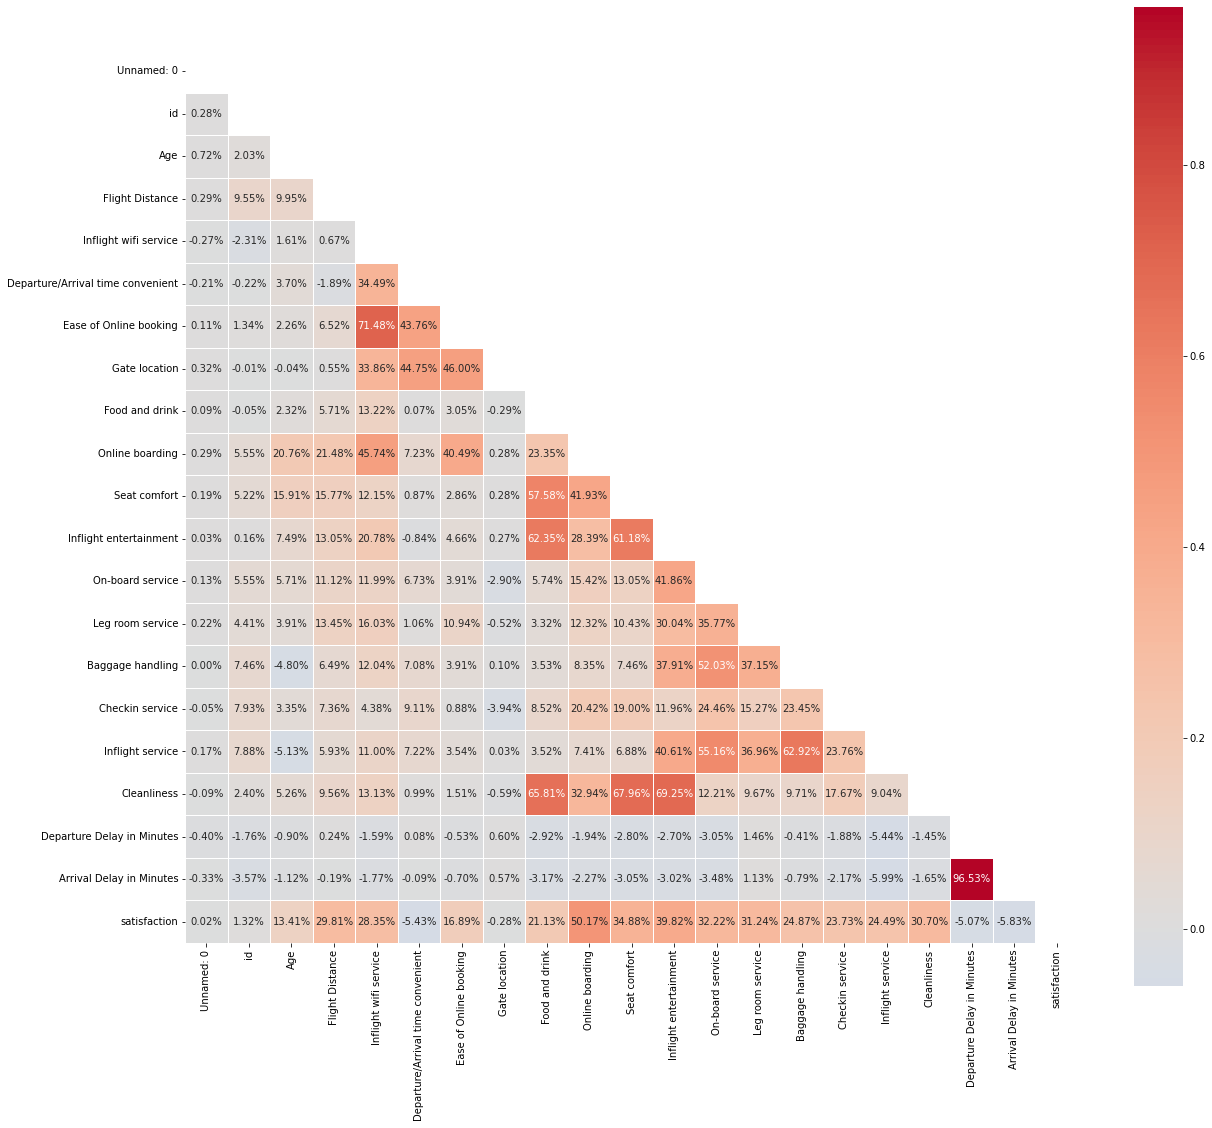

In [202]:
# Melakukan plotting correlation dengan heatmap
corr = df_corr.corr() #menghitung correlation
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
cmap = sns.color_palette("coolwarm", as_cmap=True) #color palette untuk colormap heatmap nya
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, fmt ='.2%', linewidths=.5, cbar_kws={"shrink": .9}) #plot heatmap

## Feature - Target

Berdasarkan correlation plot di atas dapat dilihat hubungan antar feature terhadap target sebagai berikut:

- Top 10 Feature-feature yang memiliki correlation tinggi terhadap target adalah :
    1. Online Boarding Services
    2. Inflight Entertainment Services
    3. Seat comfort Services
    4. On-Board Service
    5. Leg room service
    6. Cleanliness
    7. Flight Distance
    8. Inflight Wifi Service
    9. Baggage handling
    10. Inflight Service


Selain itu feature-feature yang memiliki correlation rendah adalah unnamed:0, id, gate location dimana akan menjadi konsiderasi bahwa feature ini tidak diperlukan lagi.

Hubungan correlation terhadap target ini akan menjadi pertimbangan saat data preprocessing dalam pemilihan feature.

## Feature - Feature

Berdasarkan hubungan antar feature, terdapat beberapa feature yang memiliki hubungan yang cukup tinggi antar satu sama lainnya. Dimana jika hubungan antar feature sangat tinggi dapat menciptakan redundant features pada model nantinya.

Dimana correlation yang tinggi disini memiliki correlation di atas 50%.

- Cleanliness memiliki hubungan yang cukup tinggi dengan food and drink, seat comfort, dan inflight entertainment.
- Inflight Service memiliki hubungan yang tinggi dengan Check in service, on board service.
- Baggage Handling memiliki correlation dengan On board service.
- Inflight entertainment memiliki correlation yang tinggi dengan food and drink dan seat comfort.
- Seat comfort memiliki hubungan yang tinggi dengan food and drink.
- Ease of online booking memiliki hubungan yang tinggi dengan inflight wifi service.
- Selain itu, Arrival Delay in Minutes memiliki hubungan yang sangat tinggi dengan Deparature Delay in minutes.

Sehingga insight-insight ini akan menjadi pertimbangan konsiderasi dalam feature selection.

# Data Preprocessing

# Handling Missing Values

Melakukan pengecekan apakah ada missing values:

In [203]:
#cek missing value
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

Sebelumnya telah diketahui bahwa terdapat missing value sebanyak 393 data pada column Arrival Delay in minutes.

In [204]:
# Cek missing value pada column arrival delay
df[df['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,127976,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
128037,128037,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,128205,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
129032,129032,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


Karena terdapat missing value sebanyak 393 data dari 129880 data atau hanya sebanyak 0.3 % dari total data maka disini Saya akan baris data yang berisikan missing value. Sehingga Saya akan drop sebanyak 393 data.

Kemungkinan missing values ini terjadi karena tidak terinput data delay pada saat kedatangan atau arrival oleh petugas. Sehingga terjadinya missing values ini tidak ada korelasinya dengan variabel lainnya.

In [205]:
#drop missing value

df_clean = df.dropna(axis=0) #axis 0 adalah baris

In [206]:
# Cek missing value settelah handling

df_clean.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Terlihat data sudah tidak ada missing value.

## Drop Column tidak diperlukan :

Selanjutnya sebelumnya telah diketahui bahwa terdapat beberapa column yang tidak diperlukan dalam modelling karena tidak akan ada pengaruhnya, yaitu id dan Unnamed: 0. Sehingga selanjutnya Saya akan drop column tersebut:

In [207]:
df_final = df_clean.drop(columns=['Unnamed: 0','id'],axis=1)

In [208]:
df_final.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Terlihat column Unnamed 0 dan id sudah tidak ada pada dataframe.

In [209]:
# reset index
df_final.reset_index(drop =True, inplace=True)

In [210]:
# melihat shape
df_final.shape

(129487, 23)

## Splitting Data Train-Test

Melakukan splitting data untuk keperluan modelling ini mejadi data Train-Test.

In [211]:
# Splitting data menjadi X(features), y(target) 
X,y = df_final.drop('satisfaction',axis=1), df_final['satisfaction']

In [212]:
# Split data X (features) dan y(target) menjadi data train-test set

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size= 0.2, random_state = 98)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_test.shape)

print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_test.shape)

X Train Size :  (103589, 22)
X Test Size  :  (25898, 22)
y Train Size :  (103589,)
y Test Size  :  (25898,)


Setelah di split melakukan reset index karena sebelumnya telah diacak maka nomor index menjadi tidak beraturan. Sehingga diperlukan reset index:

In [213]:
# Setelah itu dilakukan reset_index karena sebelumnya saat pembagian train-test secara acak

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

## Handling Outliers

Outliers akan di handling pada column numerical saja, yaitu:

In [214]:
# Variabel berisikan nama column numerical
col_num_name = ['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

In [215]:
# fungsi untuk filtering data outlier
def upper_lower(df,col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    upper_bound =  df[col].quantile(0.75) + 1.5*IQR
    lower_bound =  df[col].quantile(0.25) - 1.5*IQR
    return df[(df[col]> lower_bound)&(df[col]> upper_bound)]

In [216]:
#Membuat tabel berisikan nama column dan persentase outliernya
outliers_percentage = pd.DataFrame(columns = ['Columns', 'Outlier Percentage'])

for i in range(len(col_num_name)):
    outliers_percentage.loc[i] = [col_num_name[i], round(upper_lower(X_train,col_num_name[i]).shape[0]/ X_train.shape[0]*100,2)]

In [217]:
outliers_percentage

,Columns,Outlier Percentage
0,Age,0.00
1,Flight Distance,2.24
2,Departure Delay in Minutes,13.91
3,Arrival Delay in Minutes,13.53


- Handling outlier akan dilakukan dimana column tersebut memiliki outlier percentage di bawah 15%.

- Column yang memiliki outlier percentage di atas 15% akan tidak dilakukan handling outlier.

- Terlihat bahwa pada column Age tidak ada outlier, selain itu, pada column numerical lainnya terdapat outlier dengan persentase di bawah 15% maka column ini akan dilakukan handling dengan menggunakan teknik capping metode IQR karena tidak semua terdistribusi normal.

Setelah itu verifikasi dengan menggunakan box plot dan histogramnya:

Pengecekan Outliers pada column :  Age


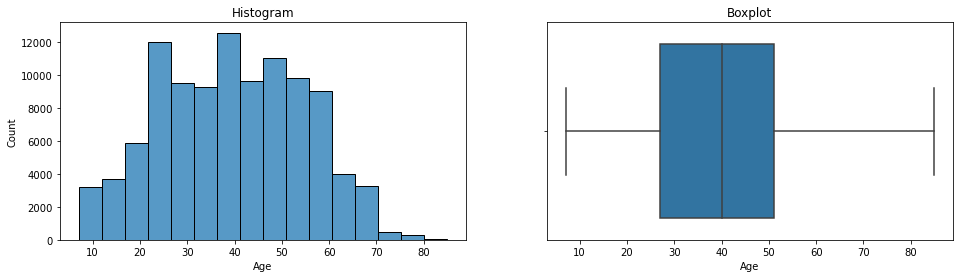

Pengecekan Outliers pada column :  Flight Distance


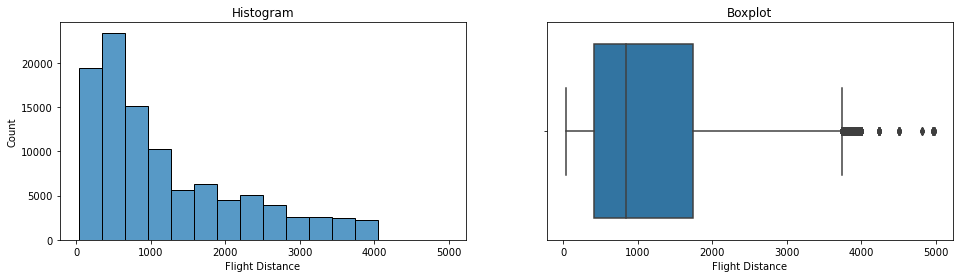

Pengecekan Outliers pada column :  Departure Delay in Minutes


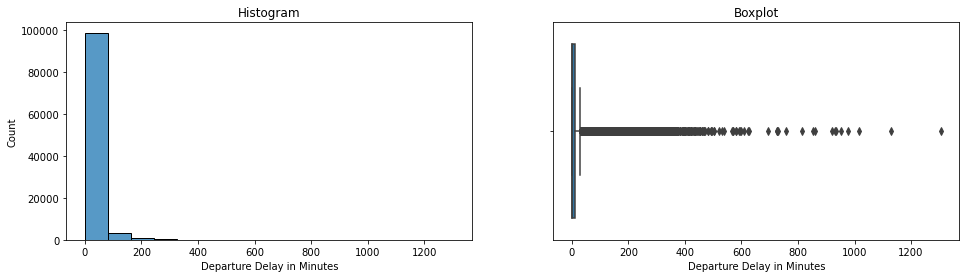

Pengecekan Outliers pada column :  Arrival Delay in Minutes


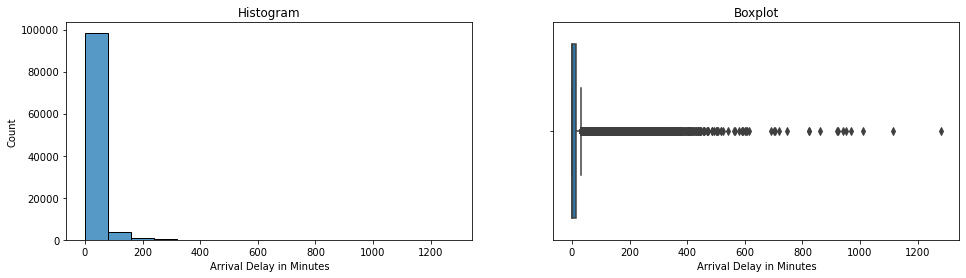

In [218]:
for col in col_num_name:
    print('Pengecekan Outliers pada column : ',col)
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x = col,data=X_train,bins=16)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = col,data=X_train)
    plt.title('Boxplot')
    plt.show()

Terlihat memang outliers berada pada column flight distance, Arrival dan Departure Delay.

Setelah itu melakukan handling outliers:

In [219]:
# Handling outliers dengan metode capping, IQR dengan bantuan library Winsorizer
windsoriser = outliers.Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']) #column yang akan dilakukan handling

windsoriser.fit(X_train) # fit capping
X_train_clean = windsoriser.transform(X_train) #transform capping disimpan pada variabel X_train_clean dimana data sudah bebas dari outleirs

In [220]:
print('X Train setelah handling outleir Size : ', X_train.shape)
print('y Train Size : ', y_train.shape)

X Train setelah handling outleir Size :  (103589, 22)
y Train Size :  (103589,)


Terlihat setelah dilakukan handling capping size masih sama dikarenakan menggunakan metode capping, bukan trimming.

Setelah Handling Outliers pada column :  Age


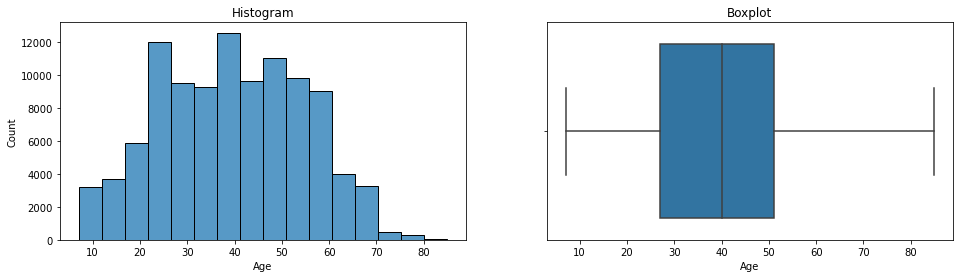

Setelah Handling Outliers pada column :  Flight Distance


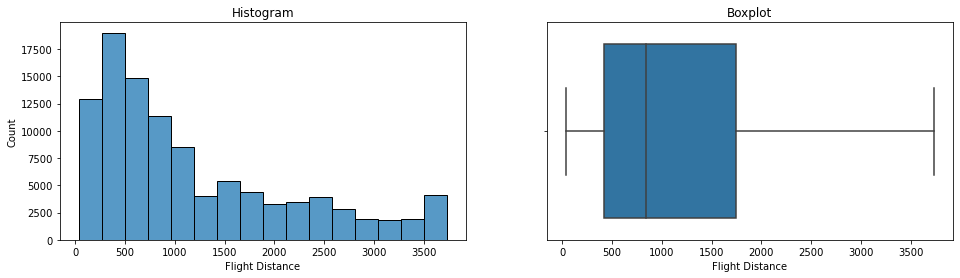

Setelah Handling Outliers pada column :  Departure Delay in Minutes


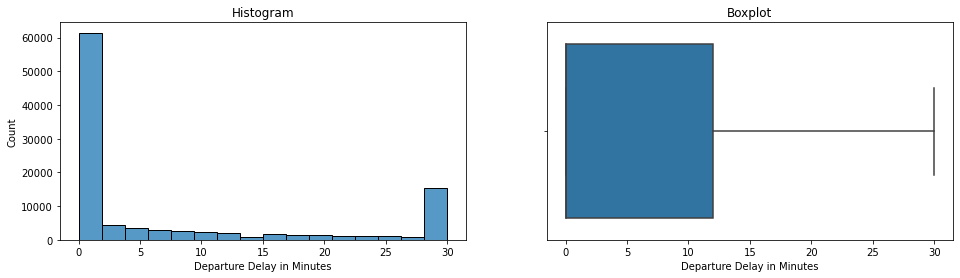

Setelah Handling Outliers pada column :  Arrival Delay in Minutes


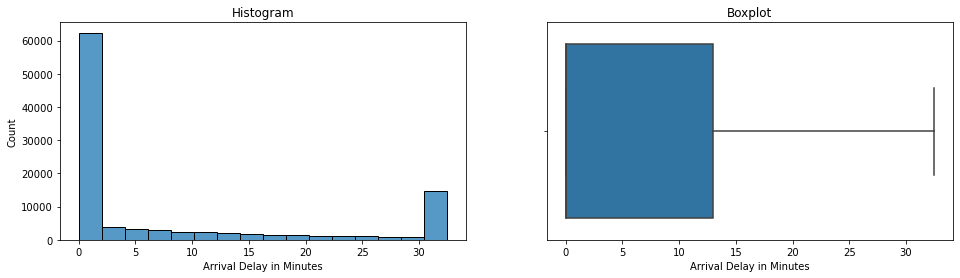

In [221]:
# Menggunakan For-loop untuk plotting histogram dan boxplot tiap column

for col in col_num_name:
    print('Setelah Handling Outliers pada column : ',col)
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x = col,data=X_train_clean,bins=16)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = col,data=X_train_clean)
    plt.title('Boxplot')
    plt.show()

Berdasarkan boxplot dan histogram sudah tidak ada outliersnya lagi pada data train.

In [222]:
X_train_clean.reset_index(drop=True,inplace=True) #reset index setelah dilakukan handling outliers


## Label Encoders Target

Karena pada data target masih dalam bentuk string maka akan dilakukan encoding terlebih dahulu agar data target sudah menjadi label, dimana :

- Label 0 adalah neutral/dissatisfied
- Label 1 adalah satisfied

In [223]:
# Label Encoder yang sudah di fit 
target_encoder

LabelEncoder()

In [224]:
# Transform target Train
y_train_final = target_encoder.transform(y_train)

# Transform target Test
y_test_final = target_encoder.transform(y_test)

## Scaling and Encoding Features

Pada data numerical akan dlikakuan scaling dengan menggunakan metode MinMax. Metode ini digunakan karena terdapat beberapa data yang tidak terdistribusi normal.

Selain itu untuk data categorical akan dilakukan encoding dengan OneHotEncoder untuk feature categorical dengan tipe nominal dan dilakukan encoding dengan OrdinalEncoder untuk feature categorical yang bertipe ordinal.

### Scaling :

Pada scaling ini akan menggunakan pipeline agar lebih mudah dan nanti akan digabungkan step nya dengan saat training model, scaling diperuntukan untuk data numerical :

In [225]:
# Scaling_features

features_scaler = Pipeline([("minmax",preprocessing.MinMaxScaler())]) #defaulte minmax scaler di scaling pada range 0 hingga 1

### Encoding

Nominal :

Pada feature categorical nominal akan dilakukan encoding dengan menggunakan onehot encoder.

Pada dataset ini, feature categorical yang bertipe nominal adalah Gender, Customer Type, dan Type of Travel.

In [226]:
# onehotencoder

features_ohe = Pipeline([("ohe",preprocessing.OneHotEncoder(handle_unknown = 'ignore'))]) #default

Ordinal :

Pada feature categorical ordinal akan dilakukan encoding dengan menggunakan ordinal encoder.

Pada dataset ini, feature categorical yang bertipe ordinal adalah Class saja dengan level ['Eco','Eco Plus','Business']

In [227]:
level= [['Eco','Eco Plus','Business']] #urutan ordinal

In [228]:
# ordinal encoder

features_ordinal = Pipeline([("ord",preprocessing.OrdinalEncoder(categories=level))])

Selanjutnya akan dibuat column transformer yang menggabungkan proses scaling dan encoding pada saat feature selection.

In [229]:
# Variabel berisikan nama column dengan tipe data numerical
col_numer_name = ['Age', 'Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [230]:
# Variabel berisikan nama column dengan tipe data nominal
col_nominal = ['Gender', 'Customer Type', 'Type of Travel']

In [231]:
# Variabel berisikan nama column dengan tipe data ordinal
col_ordinal = ['Class']

# Feature Selection

Sebelumnya telah dilakukan correlation analysis antar features untuk memilih sebuah features untuk model machine learning. 

Selain itu terdapat metode-metode lain yang dapat digunakan untuk mencari data pendukung dalam pemilihan feature, yaitu:

Membuat Column Transformer untuk data yang akan digunakan untuk menghitung feature importance dan untuk proses feature selection:

In [232]:
#transformer fi adalah proses scaling encoding data untuk kebutuhan feature importance
transformer_fi = ColumnTransformer(
    transformers=[
        ("numerical", features_scaler, col_numer_name),
        ("ordinal", features_ordinal, col_ordinal),
        ("nominal", features_ohe, col_nominal)
    ]
)

In [233]:
# split data X feature dan target y untuk feature importance
X_fi,y_fi = df_clean.drop(columns='satisfaction',axis=1),df_clean['satisfaction']

In [234]:
# scaling encoding data
X_fi_tranform = transformer_fi.fit_transform(X_fi) #transform scaling encoding data X untuk feature importance
y_fi_tranform = target_encoder.transform(y_fi) #transform label encoding data y untuk feature importance

In [235]:
# nama column setelah dilakukan scaling encoding
col_final = ['Age', 'Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','Class','Female','Male','Loyal Customer','disloyal Customer', 'Business Travel','Personal Travel']

In [236]:
# membuat hasil transformer menjadi dataframe
df_fi = pd.DataFrame(X_fi_tranform, columns= col_final)

In [237]:
#melihat 5 data perama
df_fi.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class,Female,Male,Loyal Customer,disloyal Customer,Business Travel,Personal Travel
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,1.0,0.015704,0.011364,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.2,0.000628,0.003788,2.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,1.0,0.000000,0.000000,2.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.4,0.006910,0.005682,2.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.6,0.000000,0.000000,2.0,0.0,1.0,1.0,0.0,1.0,0.0


### Feature Importance

Feature yang nanti dipiliha dalah feature yang merupakan top 10 memiliki pengaruh atau hubungan tinggi terhadap data target.

Namun hal ini akan di dibandingkan dengan hasil analisa correlation plot baik hubungan feature antar featur dan feature antar target agar tidak adanya variabel redundant untuk modelling.

#### Extra Tress Classifier :

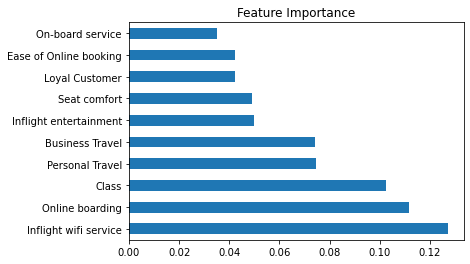

In [238]:
# Menghitung featture importance dengan menggunakan Extra trees classifier

model_fi = ExtraTreesClassifier(random_state=98) #model feature importance
model_fi.fit(df_fi,y_fi_tranform) # pada data X terhadap y dilakukan training (fit)
feat_importances = pd.Series(model_fi.feature_importances_, index = df_fi.columns) # memasukan feature importance dengan index nama column pada data X (features)
feat_importances.nlargest(10).plot(kind='barh') # plot bar
plt.title('Feature Importance')
plt.show()

Berdasarkan Feature Importance, top 10 tertinggi adalah :

- Inflight wifi service
- Online boarding
- Business Travel & Personal Travel (Type of Travel)
- Class
- Inflight Entertainment
- Seat Comfort
- Ease of Online Booking
- Loyal Customer (Customer Type)
- On-board Service

#### Chi Score :

In [239]:
# Berdasarkan chi score dengan memilih 10 feature terbaik
selector = SelectKBest(chi2, k=10) # k=10, 10 terbaik
selector.fit(df_fi, y_fi_tranform) #fit untuk chi
df_fi_new = selector.transform(df_fi) 
print(" Top 10 tertinggi versi chi score : ",df_fi.columns[selector.get_support(indices=True)])

 Top 10 tertinggi versi chi score :  Index(['Flight Distance', 'Inflight wifi service', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service', 'Class',
       'disloyal Customer', 'Business Travel', 'Personal Travel'],
      dtype='object')


Berdasarkan feature importance dengan ExtrasTreeClassifier dan ChiScore kurang lebih mendapatkan feature yang sama dimana hanya ada 1 feature yang berbeda, dimana pada feature importance didapat Ease of Online Booking yang terbaik namun pada chi score didapat Flight distance yang terbaik.

### Feature Selection

Sehingga berdasarkan Correlation Plot di dapat hubungan Feature-Target tertinggi adalah :
-  Online Boarding Services
- Inflight Entertainment Services
- Seat comfort Services
- On-Board Service
- Leg room service
- Cleanliness
- Flight Distance
- Inflight Wifi Service
- Baggage handling
- Inflight Service

Berdasarkan Feature Importance, top 10 tertinggi adalah :

- Inflight wifi service
- Online boarding
- Business Travel & Personal Travel (Type of Travel)
- Class
- Inflight Entertainment
- Seat Comfort
- Ease of Online Booking
- Loyal Customer (Customer Type)
- On-board Service


Berdasarkan Chi Score, top 10 tertinggi adalah :

- Inflight wifi service
- Online boarding
- Business Travel & Personal Travel (Type of Travel)
- Class
- Inflight Entertainment
- Seat Comfort
- Flight Distance
- disloyal Customer (Customer Type)
- On-board Service

Sehingga berdasarkan poin di atas maka feature-feature yang akan dipilih adalah :

- Inflight wifi service
- Online boarding
- Business Travel & Personal Travel (Type of Travel)
- Class
- Inflight Entertainment
- Seat Comfort
- Flight Distance
- disloyal Customer (Customer Type)
- On-board Service
- Leg room service
- Cleanliness
- Baggage handling
- Inflight Service
- Ease of online booking

Namun Selanjutnya perlu dipikirkan insight yang didapat saat melihat correlation antar feature nya, dimana didapatkan :

- Cleanliness memiliki hubungan yang cukup tinggi dengan food and drink, seat comfort, dan inflight entertainment.
- Inflight Service memiliki hubungan yang tinggi dengan Check in service, on board service.
- Baggage Handling memiliki correlation dengan On board service.
- Inflight entertainment memiliki correlation yang tinggi dengan food and drink dan seat comfort.
- Seat comfort memiliki hubungan yang tinggi dengan food and drink.
- Ease of online booking memiliki hubungan yang tinggi dengan inflight wifi service.
- Selain itu, Arrival Delay in Minutes memiliki hubungan yang sangat tinggi dengan Deparature Delay in minutes.


Sehingga karena antar feature ini memiliki hubungan yang kuat, maka akan dipilih salah satu saja di antara feature yang memiliki correlation tinggi untuk menghindari terjadinya redundant features.

Dimana decision yang diambil adalah sebagai berikut :
- Cleanliness, seat comfort sudah di wakilkan oleh inflight entertainment.
- Inflight service dan baggage handling sudah di wakilkan dengan on board service
- Ease of online booking sudah diwakilkan dengan inflight wifi service

Sehingga dipilih feature-feature di bawah ini yang akan digunakan dalam modelling:
- Inflight wifi service
- Online boarding
- Business Travel & Personal Travel (Type of Travel)
- Class
- Inflight Entertainment
- Flight Distance
- disloyal Customer (Customer Type)
- On-board Service
- Leg room service

Sehingga pada model ini, feature yang digunakan sebanyak 9 feature.

Sehingga selected featurenya adalah = ['Inflight wifi service','Online boarding','Type of Travel','Class', 'Inflight entertainment', 'Flight Distance','Customer Type', 'On-board service', 'Leg room service']

In [240]:
# variabel selected numerical column
selected_num = ['Inflight wifi service','Online boarding', 'Inflight entertainment', 'Flight Distance', 'On-board service', 'Leg room service']

# variabel selected ordinal column
selected_ord = ['Class']

# variabel selected nominal column
selected_nom = ['Type of Travel','Customer Type']

## Preprocessing Pipe

Membuat column transformer untuk preprocessing data modeeling :

In [241]:
# Membuat column transformer untuk melakukan data preprocessing berupa scaling dan encoding sesuai tipe datanya. Column yang dimasukan adalah column yang dipilih sesuai hasil feature selection
preprocess = ColumnTransformer(
    transformers=[
        ("num", features_scaler, selected_num), #data numerical
        ("ord", features_ordinal, selected_ord), #data ordinal
        ("nom", features_ohe, selected_nom) #data nominal
    ]
)

In [242]:
preprocess.fit(X_train_clean)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('minmax', MinMaxScaler())]),
                                 ['Inflight wifi service', 'Online boarding',
                                  'Inflight entertainment', 'Flight Distance',
                                  'On-board service', 'Leg room service']),
                                ('ord',
                                 Pipeline(steps=[('ord',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]))]),
                                 ['Class']),
                                ('nom',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Type of Travel', 'Customer Type'])])

# Model Definition

Pada kasus ini akan membuat model classification. Model ini akan digunakan untuk memprediksi kepuasan penumpang maskapai.

Pada kasus ini akan menggunakan model yang memang diperuntukan untuk classification, yaitu :
- Logistic Regression, 
- Decision Tree, 
- Random Forest, 
- KNN, 
- AdaBoost Classifier,
- Gradient Boosting.

Pertama-tama akan dilakukan pencarian model terbaik dengan menggunakan Cross Validation. Dimana metode ini digunakan untuk mengevaluasi tiap model dengan sekian fold lalu dilihat rata-rata dan standar deviasi score yang didapat. Lalu score tersebut akan dibandingkan antar model dan dicari model dengan score terbaik. Model ini dibandingkan dengan parameter default.

Seteleah itu pada model parameter terbaik akan dilakukan hyperparameter tuning dimana akan mencari hyperparameter terbaik dan tepat untuk model. Hyperparameter tuning dilakukan dengan menggunakan GridSearchCV.

Setelah model based dievaluasi, Model akan dilakukan Hyperparameter tuning untuk mencapai score yang diinginkan. Scoring tuning akan berdasarkan  F1 Score. Karena pada kasus ini terutama memprediksi kepuasan penumpang maskapai diperlukan F1 score dan score AUC untuk melihat kapabilitas dan ketepatan model dalam melakukan klasifikasi.

Pada kasus ini karena kasus classification, maka metrics yang akan digunakan adalah F1 Score, Precision, Recall, ROC-AUC, dan accuracy selain itu akan dilihat juga Confusion Matrixnya untuk melihat persebaran hasil prediksinya.



# Model Training

# Based Model (Hyperparameter = default)

### Logistic Regression

Mendefinisikan model dengan pipeline dengan parameter default:

In [243]:
#build pipe model dengan default parameter 

pipe_logreg = Pipeline([('preprocessing',preprocess),('logisticregression',LogisticRegression())])

#train model default

logreg_default = pipe_logreg.fit(X_train_clean,y_train_final)

logreg_default


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Inflight wifi service',
                                                   'Online boarding',
                                                   'Inflight entertainment',
                                                   'Flight Distance',
                                                   'On-board service',
                                                   'Leg room service']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']]))]),
                                                  ['Class']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type of Travel',
                                                   'Customer Type'])])),
                ('logisticregression', LogisticRegression())])

### Decision Tree

Mendefinisikan model dengan pipeline dengan parameter default:

In [244]:
#build pipe model dengan default parameter 

pipe_dtc = Pipeline([('preprocessing',preprocess),('decisiontreeclassifier',DecisionTreeClassifier())])

#train model default

dtc_default = pipe_dtc.fit(X_train_clean,y_train_final)
dtc_default


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Inflight wifi service',
                                                   'Online boarding',
                                                   'Inflight entertainment',
                                                   'Flight Distance',
                                                   'On-board service',
                                                   'Leg room service']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']]))]),
                                                  ['Class']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type of Travel',
                                                   'Customer Type'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### Random Forest

Mendefinisikan model dengan pipeline dengan parameter default:

In [245]:
#build pipe model dengan default parameter 

pipe_rfc = Pipeline([('preprocessing',preprocess),('randomforestclassifier',RandomForestClassifier(random_state=98))])

#train model default

rfc_default = pipe_rfc.fit(X_train_clean,y_train_final)
rfc_default


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Inflight wifi service',
                                                   'Online boarding',
                                                   'Inflight entertainment',
                                                   'Flight Distance',
                                                   'On-board service',
                                                   'Leg room service']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']]))]),
                                                  ['Class']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type of Travel',
                                                   'Customer Type'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=98))])

### KNN

Mendefinisikan model dengan pipeline dengan parameter default:

In [246]:
#build pipe model dengan default parameter 

pipe_knn = Pipeline([('preprocessing',preprocess),('knnc',KNeighborsClassifier())])

#train model default

knn_default = pipe_knn.fit(X_train_clean,y_train_final)
knn_default


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Inflight wifi service',
                                                   'Online boarding',
                                                   'Inflight entertainment',
                                                   'Flight Distance',
                                                   'On-board service',
                                                   'Leg room service']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']]))]),
                                                  ['Class']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type of Travel',
                                                   'Customer Type'])])),
                ('knnc', KNeighborsClassifier())])

### AdaBoost Classifier

Mendefinisikan model dengan pipeline dengan parameter default:

In [247]:
#build pipe model dengan default parameter 

pipe_ac = Pipeline([('preprocessing',preprocess),('adaboost',AdaBoostClassifier(random_state=98))])

#train model default

ac_default = pipe_ac.fit(X_train_clean,y_train_final)
ac_default


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Inflight wifi service',
                                                   'Online boarding',
                                                   'Inflight entertainment',
                                                   'Flight Distance',
                                                   'On-board service',
                                                   'Leg room service']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']]))]),
                                                  ['Class']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type of Travel',
                                                   'Customer Type'])])),
                ('adaboost', AdaBoostClassifier(random_state=98))])

### Gradient Boost Classifier

Mendefinisikan model dengan pipeline dengan parameter default:

In [248]:
#build pipe model dengan default parameter 

pipe_gb = Pipeline([('preprocessing',preprocess),('gradientboosting',GradientBoostingClassifier(random_state=98))])

#train model default

gb_default = pipe_gb.fit(X_train_clean,y_train_final)
gb_default


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Inflight wifi service',
                                                   'Online boarding',
                                                   'Inflight entertainment',
                                                   'Flight Distance',
                                                   'On-board service',
                                                   'Leg room service']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']]))]),
                                                  ['Class']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type of Travel',
                                                   'Customer Type'])])),
                ('gradientboosting',
                 GradientBoostingClassifier(random_state=98))])

## Find Best Model with Cross Validation Score

Cross Validation Score digunakan untuk membandingkan score antar model dengan hyperparameter default seluruhnya selain itu cross validation dilakukan dengan jumlah fold (cv) adalah 10.

Scoring yang akan dipakai dalam Cross Validation Score adalah accuracy, f1-score, ROC-AUC dalam berupa rata-rata (mean) dan standar deviasinya dari hasil iterasi cross validation 10 fold tersebut.

In [249]:
#Membuat list kosong yang nanti akan menanmpung isi score accuracy mean dan std.
accuracy_mean = []
accuracy_std = []
#Membuat list kosong yang nanti akan menanmpung isi score f1 mean dan std.
f1_mean = []
f1_std = []
#Membuat list kosong yang nanti akan menanmpung isi score roc_auc mean dan std.
roc_auc_mean = []
roc_auc_std = []

models_pipe = [pipe_logreg,pipe_dtc,pipe_rfc,pipe_knn,pipe_ac, pipe_gb] #list pipe model
names = ["Logistic Regression", "Decision Tree Classifier","Random Forest Classifier", "K-Nearest Neighbor", "AdaBoost Classifier","Gradient Boosting Classifier"] #nama model
for pipe, name in zip(models_pipe, names):
    start = time.time() #menyatat start time
    for score in ["accuracy","f1", "roc_auc"]: #score yang digunakan adalah accuracy, f1, dan roc auc
        mean_score = round(model_selection.cross_val_score(pipe, X_train_clean, y_train_final,scoring=score, cv=10).mean(),3) #menghitung score rata-rata
        std_score = round(model_selection.cross_val_score(pipe, X_train_clean, y_train_final,scoring=score, cv=10).std(),3) #menghitung standar deviasi score
        print ("{} mean pada model {} adalah {}".format(score, name,mean_score))
        print ("{} std pada model {} adalah {}".format(score, name,std_score))
        if score == "accuracy": # Selanjutnya memasukan score kedalam list kosong yang sebelumnya telah dibuat
            accuracy_mean.append(mean_score)
            accuracy_std.append(std_score)
        elif score == "f1":
            f1_mean.append(mean_score)
            f1_std.append(std_score)
        elif score == "roc_auc":
            roc_auc_mean.append(mean_score)
            roc_auc_std.append(std_score)
    print ("Time process : ", round((time.time() - start),2)) #menghitung waktu proses

accuracy mean pada model Logistic Regression adalah 0.866
accuracy std pada model Logistic Regression adalah 0.004
f1 mean pada model Logistic Regression adalah 0.843
f1 std pada model Logistic Regression adalah 0.006
roc_auc mean pada model Logistic Regression adalah 0.92
roc_auc std pada model Logistic Regression adalah 0.004
Time process :  22.69
accuracy mean pada model Decision Tree Classifier adalah 0.918
accuracy std pada model Decision Tree Classifier adalah 0.003
f1 mean pada model Decision Tree Classifier adalah 0.906
f1 std pada model Decision Tree Classifier adalah 0.003
roc_auc mean pada model Decision Tree Classifier adalah 0.918
roc_auc std pada model Decision Tree Classifier adalah 0.003
Time process :  18.79
accuracy mean pada model Random Forest Classifier adalah 0.928
accuracy std pada model Random Forest Classifier adalah 0.003
f1 mean pada model Random Forest Classifier adalah 0.916
f1 std pada model Random Forest Classifier adalah 0.003
roc_auc mean pada model Ran

Terlihat hasil score dan waktu prosesnya, dimana terlihat Gradient Boost Classifier dan Random Forest Classifier memakan waktu yang cukup lama.

Membuat dataframe dari cross val score yang telah dilakukan untuk membandingkan antar model :

In [250]:
score_df = pd.DataFrame([accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std], index= ['accuracy_mean','accuracy_std','f1_mean','f1_std','roc_auc_mean','roc_auc_std'],columns = names)
score_df = score_df.T # ditranspose agar nama model berada pada index dan perhitung score menjadi column

Menambah column yang berisikan batas atas score (mean+std) dan batas bawah score (mean-std):

In [251]:
# Menghitung batas_atas accuracy
score_df['batas_atas_accuracy'] = score_df['accuracy_mean'] + score_df['accuracy_std']
# Menghitung batas_bawah accuracy
score_df['batas_bawah_accuracy'] = score_df['accuracy_mean'] - score_df['accuracy_std']

# Menghitung batas_atas f1
score_df['batas_atas_f1'] = score_df['f1_mean'] + score_df['f1_std']
# Menghitung batas_bawah f1
score_df['batas_bawah_f1'] = score_df['f1_mean'] - score_df['f1_std']

# Menghitung batas_atas roc_auc
score_df['batas_atas_roc_auc'] = score_df['roc_auc_mean'] + score_df['roc_auc_std']
# Menghitung batas_bawah roc_auc
score_df['batas_bawah_roc_auc'] = score_df['roc_auc_mean'] - score_df['roc_auc_std']

- Pada pemilihan model base terbaik akan menggunakan metrics roc_auc dan f1 score karena disini ingin memilih model yang dapat mengklasifikasi dengan baik.

Di urutkan berdasarkan score AUC :

In [252]:
score_df.sort_values('roc_auc_mean',ascending=False)

,accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std,batas_atas_accuracy,batas_bawah_accuracy,batas_atas_f1,batas_bawah_f1,batas_atas_roc_auc,batas_bawah_roc_auc
Gradient Boosting Classifier,0.934,0.003,0.923,0.004,0.982,0.001,0.937,0.931,0.927,0.919,0.983,0.981
Random Forest Classifier,0.928,0.003,0.916,0.003,0.980,0.001,0.931,0.925,0.919,0.913,0.981,0.979
K-Nearest Neighbor,0.930,0.003,0.919,0.003,0.971,0.002,0.933,0.927,0.922,0.916,0.973,0.969
AdaBoost Classifier,0.914,0.004,0.900,0.005,0.971,0.002,0.918,0.910,0.905,0.895,0.973,0.969
Logistic Regression,0.866,0.004,0.843,0.006,0.920,0.004,0.870,0.862,0.849,0.837,0.924,0.916
Decision Tree Classifier,0.918,0.003,0.906,0.003,0.918,0.003,0.921,0.915,0.909,0.903,0.921,0.915


Di urutkan berdasarkan score F1 :

In [253]:
score_df.sort_values('f1_mean',ascending=False)

,accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std,batas_atas_accuracy,batas_bawah_accuracy,batas_atas_f1,batas_bawah_f1,batas_atas_roc_auc,batas_bawah_roc_auc
Gradient Boosting Classifier,0.934,0.003,0.923,0.004,0.982,0.001,0.937,0.931,0.927,0.919,0.983,0.981
K-Nearest Neighbor,0.930,0.003,0.919,0.003,0.971,0.002,0.933,0.927,0.922,0.916,0.973,0.969
Random Forest Classifier,0.928,0.003,0.916,0.003,0.980,0.001,0.931,0.925,0.919,0.913,0.981,0.979
Decision Tree Classifier,0.918,0.003,0.906,0.003,0.918,0.003,0.921,0.915,0.909,0.903,0.921,0.915
AdaBoost Classifier,0.914,0.004,0.900,0.005,0.971,0.002,0.918,0.910,0.905,0.895,0.973,0.969
Logistic Regression,0.866,0.004,0.843,0.006,0.920,0.004,0.870,0.862,0.849,0.837,0.924,0.916


Berdasarkan urutan score ROC-AUC nya didapat top 3 model sebagai berikut :
- Gradient Boosting Classifier
- Random Forest Classifier
- K-Nearest Neighbor

Berdasarkan urutan score F1 nya didapat top 3 model sebagai berikut :
- Gradient Boosting Classifier
- K-Nearest Neighbor
- Random Forest Classifier

Sehingga berdasarkan urutan ini, karena pada classification ini akan menggunakan metric f1 score dan roc-auc nya maka model yang dipilih adalah Gradient Boosting Classifier dimana pada model ini mendapatkan score F1 dan ROC-AUC yang paling tinggi dan juga standar deviasi yang dihasilkan sangat kecil.

## Grid Search ( Find Best Hyperparameter)

Setelah mendapatkan model based yang terbaik maka selanjutnya akan dilakukan Hyperparameter Tuning dengan menggunakan Grids Search:

Pada Gradient Boosting Classifier terdapat hyperparameter sebagai berikut yang akan diggunakan pada hyperparameter tuning:

- n_estimators : [50,100,150]
- learning rate : [0.5,1,2]
- random_state :98 (untuk mengcontrol randomseed)

Hyperparameter variasinya tidak terlalu banyak karena pada Grid Search untuk model Gradient Boosting Classifier memakan waktu yang sangat lama.

Scoring yang digunakan adalah metric f1 score karena disini mengharapkan mendapatkan model dengan f1 score terbaik agar model memiliki nilai precision dan recall yan baik keduanya.

In [254]:
#Menentukan Hyperparameter dan value variasinya

params =[{'gradientboosting__n_estimators' :[50,100,150],
                'gradientboosting__learning_rate' : [0.5,1,2],
                'gradientboosting__random_state' : [98],
                }]

Selanjutnya GridSearch akan dilakukan dengan k-fold atau CV sebesar 10.

Grid Search CV=10  Metric = F1 :

In [255]:
#Grid Search model dengan scoring f1 score
grid_search_gradient_boosting = model_selection.GridSearchCV(pipe_gb,param_grid = params, cv=10, scoring = 'f1')

#Train model dengan mencari f1 score terbaik pada variasi hyperparameter
grid_search_gradient_boosting.fit(X_train_clean,y_train_final)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Online '
                                                                          'boarding',
                                                                          'Inflight '
                                                                          'entertainment',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder(categories=[['Eco',
                                                                                                                      'Eco '
                                                                                                                      'P...
                                                                                                                      'Business']]))]),
                                                                         ['Class']),
                                                                        ('nom',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Customer '
                                                                          'Type'])])),
                                       ('gradientboosting',
                                        GradientBoostingClassifier(random_state=98))]),
             param_grid=[{'gradientboosting__learning_rate': [0.5, 1, 2],
                          'gradientboosting__n_estimators': [50, 100, 150],
                          'gradientboosting__random_state': [98]}],
             scoring='f1')

In [256]:
grid_search_gradient_boosting.best_params_

{'gradientboosting__learning_rate': 0.5,
 'gradientboosting__n_estimators': 150,
 'gradientboosting__random_state': 98}

Didapat parameter terbaik adalah learning rate 0.5 dan n_estimators 150. Diamana parameter ini yang akan digunakan dalam model tuning.

# Model Evaluation

Pada section ini akan dilakukan prediksi terhadap data train dan data test, lalu dilakukan perhitungan metrics score. Setelah itu analisa akan dilakukan pada section Evaluation Model Analysis.

## Based Model

Melakukan prediksi pada data train test dengan model based:

In [257]:
y_train_pred_based = gb_default.predict(X_train_clean) #predict pada data train
y_test_pred_based = gb_default.predict(X_test) #predict pada data test

Membandingkan hasil prediksi train-test model :

In [258]:

print("F1 Score based model train: ",metrics.f1_score(y_train_final,y_train_pred_based))

print("F1 Score based model test: ",metrics.f1_score(y_test_final,y_test_pred_based))

F1 Score based model train:  0.9227728109977986
F1 Score based model test:  0.9202547542160029


- Berdasarkan perbandingan F1 Score yang dihasilkan pada prediksi data train maupun data test memiliki perbedaan yang tidak jauh, yaitu hanya  sebesar 0.0025 saja dimaan perbedaan ini sangatlah kecil.
- Sehingga dapat dinilai bahwa model termasuk pada kategori good fit.

Melihat hasil metric test model :

In [259]:
print("F1 Score based model test: ",metrics.f1_score(y_test_final,y_test_pred_based))
print("ROC-AUC Score based model test: ",metrics.roc_auc_score(y_test_final,y_test_pred_based))
print("Accuracy Score based model test: ",metrics.accuracy_score(y_test_final,y_test_pred_based))
print("Precision Score based model test: ",metrics.precision_score(y_test_final,y_test_pred_based))
print("Recall Score based model test: ",metrics.recall_score(y_test_final,y_test_pred_based))

F1 Score based model test:  0.9202547542160029
ROC-AUC Score based model test:  0.9288897225204714
Accuracy Score based model test:  0.9313460498880223
Precision Score based model test:  0.9308592686689048
Recall Score based model test:  0.9098891352549889


- Score metric yang di hasilkan dalam prediksi data test mendapatkan score di atas 0,9 pada seluruh metric score dimana ini menandakan bahwa model memiliki kemapuan yang baik dalam mengklasifikasi data.
- Selain itu dapat dilihat Precision Score lebih tinggi sedikit dibandingkan Recall Scorenya sehingga hal ini menandakan bahwa model lebih bisa menghindari terjadinya False Positive dibandingkan dengan False Negative.
- Berdasarkan ROC-AUC nya didapat score yang sangat tinggi, yaitu 0.929. Sehingga hal ini menandakan bahwa model dalam membedakan dengan baik mana pelanggan yang Satisfied dan pelanggan yang neutral/Dissatisfied. 
- Secara overall model mendapat score yang sangat baik menandakan model sudah bagus dan dapat mengklasifikasi kepuasan penumpang pada suatu maskapai penerbangan.

Confusion Matrix Metric :

<Figure size 1080x1080 with 0 Axes>

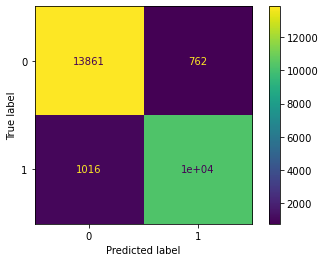

In [260]:
plt.figure(figsize=(15,15))
cm = metrics.confusion_matrix(y_test_final, y_test_pred_based, labels=gb_default.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_default.classes_)
disp.plot()
plt.show()

In [261]:
X_test.shape

(25898, 22)

- Berdasarkan pada confusion matrixnya dapat dilihat bahwa sebelumnya diketahui model memiliki precision score yang lebih tinggi dibandingkan dengan recall scorenya. Hal ini dapat ditunjukan pada confusion matrixnya dimana, data yang terprediksi False Negative (1016 data) lebih banyak dibandingkan data yang False Positive (762). Pada kasus ini menurut Saya lebih baik False Positivenya lebih kecil dibandingkan False Negativenya, mengapa? dengan lebih banyaknya data yang terprediksi tidak puas padahal penumpang puas maka ini akan menjadi pemacu perusahaan maskapai dalam meningkatkan pelayanan terhadap penumpangnya.
- Selain itu sebanyak 93.13 % (accuracy) data yang terprediksi benar dibandingkan data yang False Positive dan False Negative. Sehingga hal ini menandakan hanya 7% data yang terjadi kesalahan dalam prediksi.

## Tuning Model

Melakukan predict pada data train dan juga data test dengan model hyperparameter tuning:

In [262]:
y_train_pred_tuning = grid_search_gradient_boosting.best_estimator_.predict(X_train_clean) #predict pada data train
y_test_pred_tuning = grid_search_gradient_boosting.best_estimator_.predict(X_test) #predict pada data test

Membandingkan hasil prediksi train-test model :

In [263]:
print("F1 Score based model train: ",metrics.f1_score(y_train_final,y_train_pred_tuning))
print("F1 Score based model test: ",metrics.f1_score(y_test_final,y_test_pred_tuning))

F1 Score based model train:  0.9337804233101912
F1 Score based model test:  0.9269650311980968


- Berdasarkan perbandingan F1 Score pada model tuning yang dihasilkan pada prediksi data train maupun data test memiliki perbedaan yang tidak jauh, yaitu hanya  sebesar 0.0068 saja dimaan perbedaan ini sangatlah kecil atau hanya sebesar 0.68 % saja.
- Sehingga dapat dinilai bahwa model termasuk pada kategori good fit.

Melihat hasil metric test model :

In [264]:
print("F1 Score based model test: ",metrics.f1_score(y_test_final,y_test_pred_tuning))
print("ROC-AUC Score based model test: ",metrics.roc_auc_score(y_test_final,y_test_pred_tuning))
print("Accuracy Score based model test: ",metrics.accuracy_score(y_test_final,y_test_pred_tuning))
print("Precision Score based model test: ",metrics.precision_score(y_test_final,y_test_pred_tuning))
print("Recall Score based model test: ",metrics.recall_score(y_test_final,y_test_pred_tuning))

F1 Score based model test:  0.9269650311980968
ROC-AUC Score based model test:  0.9347229321484714
Accuracy Score based model test:  0.9371766159549
Precision Score based model test:  0.9384657335029994
Recall Score based model test:  0.9157427937915743


- Score metric yang dihasilkan dari prediksi pada data test dengan model tuning menghasilkan score yang sedikit lebih tinggi dibandingkan model yang tidak di tuning atau hyperparameternya default. Sehingga hasil grid search dengan variasi hyperparameter dapat meningkatkan atau mengimprove score metric yang dihasilkan dari model, sehingga model tuning ini terimprove menjadi model yang lebih baik.
- Score metric yang di hasilkan dalam prediksi data test mendapatkan score di atas 0,9 pada seluruh metric score dimana ini menandakan bahwa model memiliki kemapuan yang baik dalam mengklasifikasi data.
- Selain itu dapat dilihat Precision Score lebih tinggi sedikit dibandingkan Recall Scorenya sehingga hal ini menandakan bahwa model lebih bisa menghindari terjadinya False Positive dibandingkan dengan False Negative hal ini sama terjadi pada model default.
- Berdasarkan ROC-AUC nya didapat score yang sangat tinggi, yaitu 0.935. Sehingga hal ini menandakan bahwa model dalam membedakan dengan baik mana pelanggan yang Satisfied dan pelanggan yang neutral/Dissatisfied. 
- Secara overall model mendapat score yang sangat baik menandakan model sudah bagus dan dapat mengklasifikasi kepuasan penumpang pada suatu maskapai penerbangan.

Confusion Matrix Metric :

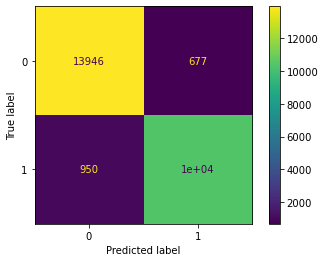

In [265]:
cm = metrics.confusion_matrix(y_test_final, y_test_pred_tuning, labels=grid_search_gradient_boosting.best_estimator_.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_gradient_boosting.best_estimator_.classes_)
disp.plot()
plt.show()

- Berdasarkan pada confusion matrixnya dapat dilihat bahwa sebelumnya diketahui model memiliki precision score yang lebih tinggi dibandingkan dengan recall scorenya. Hal ini dapat ditunjukan pada confusion matrixnya dimana, data yang terprediksi False Negative (950 data) lebih banyak dibandingkan data yang False Positive (677). Pada kasus ini menurut Saya lebih baik False Positivenya lebih kecil dibandingkan False Negativenya, mengapa? dengan lebih banyaknya data yang terprediksi tidak puas padahal penumpang puas maka ini akan menjadi pemacu perusahaan maskapai dalam meningkatkan pelayanan terhadap penumpangnya.
- Selain itu sebanyak 93.72 % (accuracy) data yang terprediksi benar dibandingkan data yang False Positive dan False Negative. Sehingga hal ini menandakan hanya 6.3% data yang terjadi kesalahan dalam prediksi.

## Comparison Models Analysis

- Score yang dihasilkan model setelah dilakukan hyperparameter tuning dengan gridsearch menghasilkan score yang lebih bagus dibandingkan model ketika hyperparameternya default.
- Hal ini menandakan bahwa, dengan menggunakan grid search ini terjadi improvement pada model dengan ditandai metric score pada uji prediksi data test yang lebih baik dari sebelumnya.
- Pada kedua model menghasilkan modelling yang good fit sehingga hal ini baik untuk model dan kecocokan pada kasus ini.
- Selain itu model hyper parameter tuning mendapatkan hasil False Positive dan False Negative yang lebih sedikit dibandingkan dengan model yang hyper parameternya default. Hal ini ditandai dengan adanya peningkatakn akurasi model sebesar 0.6%.

Sehingga secara keseluruhan, model Gradient Boosting Classifier sangat cocok digunakan pada kasus ini dengan menggunakan hyperparameter yang telah dituning.

Sehingga Saya akan menggunakan model Gradient Boosting Classifier dengan model yang sudah dilakukan hyperparameter tuning karena menghasilkan score yang lebih baik.

# Model Saving

In [266]:
# Membuat model pipline Gradient Boosting Classifier dengan best parameter based on GridSearch
model = grid_search_gradient_boosting.best_estimator_
# Fit model pada data train
model.fit(X_train_clean,y_train_final)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Inflight wifi service',
                                                   'Online boarding',
                                                   'Inflight entertainment',
                                                   'Flight Distance',
                                                   'On-board service',
                                                   'Leg room service']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco '
                                                                                               'Plus',
                                                                                               'Business']]))]),
                                                  ['Class']),
                                                 ('nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type of Travel',
                                                   'Customer Type'])])),
                ('gradientboosting',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=150,
                                            random_state=98))])

In [267]:
# save file dan disave dalam bentuk pkl pickle

with open('model.pkl','wb') as model_file:
    pickle.dump(model, model_file)

# Model Inference

Load data inference :

In [268]:
# Load data inference
data_inference = pd.read_csv('data_inference.csv')

#lihat data inference
data_inference.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,21040,Female,Loyal Customer,49,Business travel,Eco Plus,315,4,4,...,1,4,4,4,4,2,4,2,0,8.0
1,1,53040,Male,Loyal Customer,40,Personal Travel,Eco Plus,550,4,3,...,2,2,5,1,4,3,4,2,23,20.0


Pada data inference ini di buat dengan membedakan dari segi umur walau tidak terpaut jauh hanya 9 tahun, perbedaan gender, Class yang sama yaitu Eco Plus,Flight Distance yang berbeda, selain itu juga perbedaan pada score kepuasan pada layanan services yang diberikan maskapai.

## Prediction:

Predict menggunakan model based :

In [269]:
print(gb_default.predict(data_inference))

[1 0]


Predict menggunakan model hyperparameter tuning :

In [270]:
print(model.predict(data_inference))

[1 0]


Terlihat berhasalkan prediksi pada data inference bahwa:
- Pada penumpang 1 memiliki kepuasan selama perjalanan dengan maskapai penerbangan. Hal ini dapat ditunjukan dengan tinggi score kepuasan  penumpang 1 pada berbagai services yang diberikan oleh maskapai.

- Pada penumpang 2 neutral atau kurang puas dalam perjalanan dengan maskapai penerbangan. hal ini dapat ditunjukan dengan rendahnya score kepuasan pada berbagai services yang diberikan oleh maskapai.

# Conclusion

Insight yang didapat dari Dataset :

- Data target balance.
- Penumpang yang puas terhadap pelayanan maskapai berada pada rentan umur 40 tahun hingga 60 tahun dan yang tidak puas berada pada umur di bawah 40 tahun dan di atas 60 tahun.
- Berdasarkan tipe class nya, mayoritas pengguna class Eco berada pada umur di bawah 20 tahun dan di atas 70 tahun.
- Mayoritas pengguna business class berada pada umur 25 tahun hingga 60 tahun.
- Penumpang yang melakukan perjalanan untuk Business Travel mayoritas berada pada umur 20 tahun hingga 60 tahun, hal ini mungkin disebabkan karena apda umur tersebut sudah memiliki pekerjaan sehingga mereka menggunakan moda transportasi pesawat untuk keperluan businees atau pekerjaan.
- Business Class memberikan nilai yang baik terhadap pelayanan maskapai dimana terlihat bahwa mayoritas penumpang yang berada pada business class satisfied terhadap pelayanan maskapai. Namun terlihat untuk class Eco dan Eco Plus mayoritas neutral/dissatisfied terhadap pelayanan maskapai.
- Penumpang yang melakukan Business Travel mayoritas menggunakan Business Class, sedangkan penumpang yang melakukan personal Travel, mayoritas menggunakan Eco Class.
- Mayoritas penumpang satisfied terhadap pelayanan maskapai pada saat melakukan perjalanan di atas 1500. Namun, penumpang yang melakukan perjalanan di bawah 1500 secara keseluruhan neutral atau dissatisfied terhadap pelayanan maskapai.
- Mayoritas penumpang menggunakan Eco Class maskapai pada saat melakukan perjalanan di bawah distance 1500 atau jarak yang tidak jauh.
- Mayoritas penumpang menggunakan Business Class maskapai pada saat melakukan perjalanan di atas distance 1500 dimana ini adalah perjalanan jauh.
- Berdasarkan flight distancenya, mayoritas penumpang yang melakukan business travel melakukan perjalanan yang jauh dibandingkan dengan penumpang yang melakukan personal travel.
- Berdasarkan waktu delay pada Departure dan Arrival dapat dilihat bahwa ketika delay terjadi pada saat Deparature maka akan terjadi delay juga pada saat Arrival nya. Selain itu tidak ada pembeda terhadap berapa lama delaynya dengan kepuasan penumpang maskapai.
- Berdasarkan kepuasan penumpang terhadap berbagai services yang diberikan maskapai, didapat insight bahwa semakin puas penumpang (semakin tinggi score nya atau menuju angka 5 yang ditandai sangat puas) terhadap pelayanan services maskapai maka penumpang semakin puas terhadap penggunaan maskapai dalam perjalanan mereka.
- Namun terdapat services seperti ketepatan Deparature atau Arrival yang dimana semakin tinggi score kepuasannya tetapi penumpang masih neutral atau dissatisfied terhadap penggunaan maskapai pada perjalanan mereka.

Setelah melakukan correlation plot, perhitungan feature importance, dan chi2square scorenya, dipilih 9 features yang akan digunakan pada model nantinya, yaitu :
- Inflight wifi service
- Online boarding
- Business Travel & Personal Travel (Type of Travel)
- Class
- Inflight Entertainment
- Flight Distance
- disloyal Customer (Customer Type)
- On-board Service
- Leg room service

Model Evaluation Process and Analysis

- Terdapat 6 model yang digunakan untuk Classification pada kasus ini, yaitu : Logistic Regression, Decision Tree, Random Forest, KNN, AdaBoost Classifier, dan Gradient Boosting Classifier.
- Pemilihan model terbaik menggunakan metode Cross Validation Score dengan fold (CV=10). Dimana perbandingan model tersebut tanpa mengubah hyperparameternya, dimana didapat model yang terbaik berdasarkan f1 score dan auc scorenya adlaah Gradient Boosting Classifier pada kasus ini karena pada hasil cross validation model ini memiliki score tertinggi di antara 6 model tersebut.
- Selanjutnya dilakukan Hyperparameter tuning dengan GridSearchCV (CV=10), dimana didapat parameter terbaiknya adalah n_estimators = 150 dan learning_rate = 0.5 berdasarkan metric f1 score terbaiknya.


Metric yang digunakan dalam evaluasi model adalah F1 Score, ROC-AUC, Precision, Recall, dan Accuracy.

Comparison default parameter model dan hyperparameter tuning model :

- Score yang dihasilkan model setelah dilakukan hyperparameter tuning dengan gridsearch menghasilkan score yang lebih bagus dibandingkan model ketika hyperparameternya default.
- Hal ini menandakan bahwa, dengan menggunakan grid search ini terjadi improvement pada model dengan ditandai metric score pada uji prediksi data test yang lebih baik dari sebelumnya.
- Pada kedua model menghasilkan modelling yang good fit sehingga hal ini baik untuk model dan kecocokan pada kasus ini.
- Berdasarkan ROC-AUC nya didapat score yang sangat tinggi, yaitu 0.935. Sehingga hal ini menandakan bahwa model dalam membedakan dengan baik mana pelanggan yang Satisfied dan pelanggan yang neutral/Dissatisfied.
- Selain itu model hyper parameter tuning mendapatkan hasil False Positive dan False Negative yang lebih sedikit dibandingkan dengan model yang hyper parameternya default. Hal ini ditandai dengan adanya peningkatakn akurasi model sebesar 0.6%.

Sehingga secara keseluruhan, model Gradient Boosting Classifier sangat cocok digunakan pada kasus ini dengan menggunakan hyperparameter yang telah dituning.

Further Improvement :

- Mencoba membandingkan model-model algoritma lainnya dengan tiap model sudah dilakukan hyperparameter tuning.
- Mencoba variasi jumlah features pada features selection lalu melihat efeknya pada saat modelling apakah ada peningkatan atau penurunan.
- Mencari data target yang lebih banyak lagi agar data target antar dua label 50 : 50 atau lebih balance lagi. Sehingga model belajar dengan bobot label yang sama.